In [1]:
import pandas as pd
from re import sub as regex
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer as Stemmer
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv("spam.csv", encoding='latin')
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df["type"] = (df["type"] == "spam").astype(int)
# Removes special characters - only letters and numbers remain + lowers text
df['filteredSMS'] = df['sms'].apply(lambda sms: regex(r'[^a-zA-Z0-9]', ' ', sms.lower()))
# Utilizes NLTK to tokenize text
df['filteredSMS'] = df['filteredSMS'].apply(lambda sms: word_tokenize(sms))
# Utilizes removes NLTK stopwords from sms
df['filteredSMS'] = df['filteredSMS'].apply(lambda sms: [word for word in sms if word not in stopwords.words('english')])
# Utilizes NLTK Stemmer to stem words
df['filteredSMS'] = df['filteredSMS'].apply(lambda sms: [Stemmer().stem(word) for word in sms])
# Saves the processed sms in a string
df['processedSMS'] = df['filteredSMS'].apply(lambda sms: ' '.join(sms))
df.head()

,type,sms,filteredSMS,processedSMS
0,0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goe, usf, live, around, though]",nah think goe usf live around though


In [3]:
dictionary = {}
dictionary['[pad]'] = 0
dictionary['[empty]'] = 1
dictionary['[number]'] = 2
for sentence in df['filteredSMS']:
    for word in sentence:
        if word not in dictionary and not any(charater.isdigit() for charater in word):
            dictionary[word] = len(dictionary)

# Writing Dictionary to py file
with open('dictionary.py', 'w') as file:
     file.write("dictionary = ")
     file.write(str(dictionary))

Ham (0) vs Spam (1)
0    4825
1     747
Name: type, dtype: int64


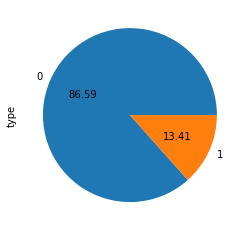

In [4]:
print("Ham (0) vs Spam (1)")
print(df['type'].value_counts())
df['type'].value_counts().plot.pie(autopct='%.2f')
plt.show()

Ham (0) vs Spam (1)
0    747
1    747
Name: type, dtype: int64


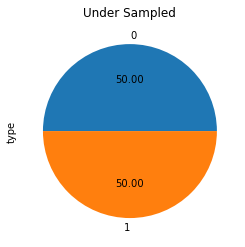

In [5]:
underSampler = RandomUnderSampler(sampling_strategy=1) # Numerical value
x, y = underSampler.fit_resample(df[['sms', 'processedSMS', 'filteredSMS']], df['type'])

print("Ham (0) vs Spam (1)")
print(y.value_counts())
ax = y.value_counts().plot.pie(autopct='%.2f')
ax.set_title("Under Sampled")
plt.show()

In [6]:
underSampledSpam = pd.concat([y, x], axis=1)
underSampledSpam.head()

,type,sms,processedSMS,filteredSMS
0,0,ok. I am a gentleman and will treat you with d...,ok gentleman treat digniti respect,"[ok, gentleman, treat, digniti, respect]"
1,0,Lol its ok I didn't remember til last nite,lol ok rememb til last nite,"[lol, ok, rememb, til, last, nite]"
2,0,Apo all other are mokka players only,apo mokka player,"[apo, mokka, player]"
3,0,Hey cutie. How goes it? Here in WALES its kind...,hey cuti goe wale kinda ok like hill shit stil...,"[hey, cuti, goe, wale, kinda, ok, like, hill, ..."
4,0,How much i gave to you. Morning.,much gave morn,"[much, gave, morn]"


In [7]:
underSampledSpam.to_csv('undersampled_spam.csv', encoding='latin')